In [1]:
import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt

In [10]:
data = sc.read_csv("../../../data_preprocessing/Lasry/2.filtering/outs/counts_norm_log_transformed.csv.gz", 
                   delimiter=" ",
                   first_column_names=True).T

In [13]:
data.var_names

Index(['AL627309.5', 'LINC01409', 'LINC01128', 'LINC00115', 'FAM41C',
       'AL645608.2', 'NOC2L', 'KLHL17', 'PLEKHN1', 'HES4',
       ...
       'MT-ND5', 'MT-ND6', 'MT-CYB', 'MAFIP', 'AC011043.1', 'AL354822.1',
       'AL592183.1', 'AC240274.1', 'AC004556.3', 'AC007325.4'],
      dtype='object', length=15770)

In [14]:
anno_cells = pd.read_csv("../../../data_preprocessing/Lasry/2.filtering/outs/anno_cells_norm.txt", sep = "\t") 
anno_samples = pd.read_csv("../../../data_preprocessing/Lasry/2.filtering/outs/anno_samples_norm.txt", sep = "\t") 
anno_genes = pd.read_csv( "../../../data_preprocessing/Lasry/2.filtering/outs/anno_genes_norm.txt", sep = "\t") 


/tmp/ipykernel_50017/2411688661.py:1: DtypeWarning: Columns (21,25,26,27,28,29,31,32,33,34,35,36,37,40,41,42,43,46,47,49,54,56,57,60,64,66,67,69) have mixed types. Specify dtype option on import or set low_memory=False.
  anno_cells = pd.read_csv("../../../data_preprocessing/Lasry/2.filtering/outs/anno_cells_norm.txt", sep = "\t")


In [15]:
data.var_names=anno_genes['gene_symbol']
print("data.var_names[1:10]")
print(data.var_names[1:10])
data.var = anno_genes
data.var.index = data.var.index.astype(str)

data.var_names[1:10]
Index(['LINC01409', 'LINC01128', 'LINC00115', 'FAM41C', 'AL645608.2', 'NOC2L',
       'KLHL17', 'PLEKHN1', 'HES4'],
      dtype='object', name='gene_symbol')


In [16]:
from matplotlib.colors import LinearSegmentedColormap

colors = [(0.7, 0.7, 0.7), (1, 0, 0)] # From gray to red
cmap_name = 'gray_to_red'
colormap = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

In [17]:
data.obs_names=anno_cells['cell_ID']
print(data.obs_names[1:10])
data.obs = anno_cells
data.obs.index = data.obs.index.astype(str)

Index(['2020.09.15.AML0024.CATCAAGTCCGAGAAG',
       '2020.09.15.AML0024.CATCCACAGGGACCAT',
       '2020.09.15.AML0024.CCTCAACAGAGCAAGA',
       '2020.09.15.AML0024.CCTCAACAGTTCCATG',
       '2020.09.15.AML0024.CCTCAACGTAGAATAC',
       '2020.09.15.AML0024.CCTCAACGTTCTCCCA',
       '2020.09.15.AML0024.CCTCAACTCCGAACGC',
       '2020.09.15.AML0024.CCTCAACTCTAGTCAG',
       '2020.09.15.AML0024.CCTCACAAGACAGTCG'],
      dtype='object', name='cell_ID')


In [18]:
## make column health_status_patient_ID
#annot = []
#annot=data.obs["health_status"].astype('str')+"_"+data.obs["sample_ID"].astype('str')
#data.obs["health_status_patient_ID"] = annot

In [19]:
# gene=anno_genes.gene_symbol[1:10].to_list()

In [20]:
data

AnnData object with n_obs × n_vars = 46702 × 15770
    obs: 'sample_ID', 'cell', 'UMAP_1', 'UMAP_2', 'orig.ident', 'samples', 'Broad_cell_identity', 'Cell_type_identity', 'clusters_res.2', 'CNV_pos', 'malignant', 'aml', 'ap_aml_age', 'age_group', 'sex.x', 'inflammation_group', 'occupancy_score', 'GSM', 'date', 'cell_ID', 'cell_type_original', 'Sample.ID', 'sex.y', 'Age', 'Sequencing', 'Institution', 'Manuscript.ID', 'Dx', 'DxELN_Cytogenetic', 'Cytogenetics', 'Overall.survival', 'Flow.report.summary', 'RAS.pathway', 'NPM1', 'IDH', 'TET2', 'TP53', 'RUNX1', 'CBF', 'MLL.rearranged', 'IDH1', 'IDH2', 'ASXL1', 'BCOR', 'CBL', 'CEBPAdm', 'CSF3R', 'DNMT3A', 'ETV6', 'FLT3.TKD', 'FLT3.ITD', 'GATA2', 'JAK2', 'KIT', 'NPM1.1', 'NRAS', 'KRAS', 'PTPN11', 'PHF6', 'RAD21', 'RUNX1.1', 'SETBP1', 'SMC1A', 'STAG2', 'SRSF2', 'SF3B1', 'TET2.1', 'U2AF1', 'WT1', 'TP53.1', 'ZRSR2', 'health_status', 'case_or_control', 'cell_type', 'cell_subtype', 'total_counts_raw', 'mito_counts', 'frac_mito', 'nr_genes', 'counts_

In [21]:
data.var_names=anno_genes['gene_symbol']

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
import numpy as np

In [24]:
x="heatlhy1"

In [25]:
data.obs["sample_ID"].unique()

array(['AML-0024', 'AML-0160', 'AML-0693', 'AML-1371', 'AML-2123',
       'AML-3133', 'AML-4340', 'healthy-1', 'healthy-2', 'healthy-3',
       'healthy-4', 'healthy-4003', 'healthy-5'], dtype=object)

In [26]:
# split by monocytic and non-monocytic AML
annot=[]
for x in data.obs["sample_ID"]:
    if x in ["AML-0024", "AML-0160"]:
        annot.append("-mono")
        
    else:
        annot.append("")
data.obs["AML_status"] = annot      

In [27]:
# # split by monocytic and non-monocytic AML
# annot=[]
# for x in data.obs["sample_ID"]:
#     if x in ["AML-0024", "AML-0160"]:
#         annot.append("-mono")
#     else:
#         annot.append("-other")
# data.obs["AML_status"] = annot      


In [28]:
annot = []
annot=data.obs["health_status"].astype('str')+data.obs["AML_status"].astype('str')
data.obs["health_status_detailed"] = annot

print(data.obs["health_status_detailed"])

0        AML-mono
1        AML-mono
2        AML-mono
3        AML-mono
4        AML-mono
           ...   
46697     healthy
46698     healthy
46699     healthy
46700     healthy
46701     healthy
Name: health_status_detailed, Length: 46702, dtype: object


In [29]:
set(data.obs["health_status_detailed"])

{'AML', 'AML-mono', 'healthy'}

In [30]:
def plot_stacked_by_healthstatus(adata,cell_type_list,gene_list, vmax,vmin):
    
    subset_data=adata[adata.obs["cell_type"].isin(cell_type_list)]
    subset_data.var["cell_type_gene_symbol"] =cell_type_list[0]+":"+subset_data.var["gene_symbol"]

    sc.pl.stacked_violin(subset_data
                       ,groupby="health_status"#"health_status_patient_ID",
                        ,var_names=cell_type_list[0]+":"+genes_list[0],
                        swap_axes=True,
                        cmap="YlGnBu"
                         ,vmax = vmax
                         ,vmin = vmin
                         ,gene_symbols="cell_type_gene_symbol"
                         ,categories_order=['healthy','AML']
                        ,return_fig=True
                         ,figsize=[4,1]
                        #,stripplot=True
                        #,jitter=True
                        #,save="by_individual_"+cell_type+"_"+gene+".pdf"
                        ).show()

In [31]:
def plot_stacked_by_healthstatus_detailed(adata,cell_type_list,gene_list, vmax,vmin):
    
    subset_data=adata[adata.obs["cell_type"].isin(cell_type_list)]
    subset_data.var["cell_type_gene_symbol"] =cell_type_list[0]+":"+subset_data.var["gene_symbol"]

    sc.pl.stacked_violin(subset_data
                       ,groupby="health_status_detailed"#"health_status_patient_ID",
                        ,var_names=cell_type_list[0]+":"+genes_list[0],
                        swap_axes=True,
                        cmap="YlGnBu"
                         ,vmax = vmax
                         ,vmin=vmin
                         ,gene_symbols="cell_type_gene_symbol"
                         ,categories_order=['healthy','AML','AML-mono']
                        ,return_fig=True
                         ,figsize=[4,1]
                        #,stripplot=True
                        #,jitter=True
                        #,save="by_individual_"+cell_type+"_"+gene+".pdf"
                        ).show()

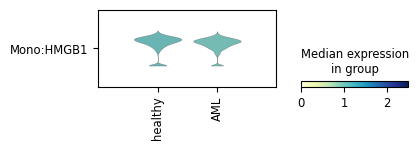

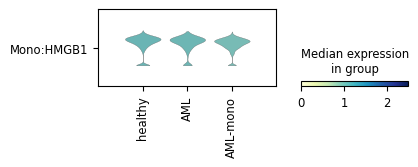

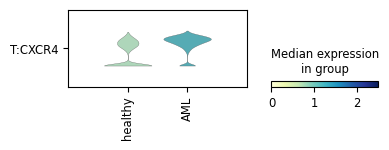

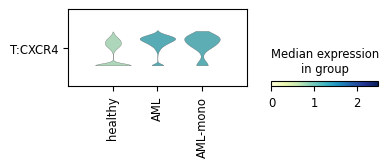

In [32]:
cell_type_list=['Mono']
genes_list=['HMGB1']
plot_stacked_by_healthstatus(data,cell_type_list,genes_list,vmin = 0, vmax = 2.5)
cell_type_list=['Mono']
genes_list=['HMGB1']
plot_stacked_by_healthstatus_detailed(data,cell_type_list,genes_list, vmax = 2.5,vmin=0)
cell_type_list=['T']
genes_list=['CXCR4']
plot_stacked_by_healthstatus(data,cell_type_list,genes_list, vmax = 2.5,vmin=0)
cell_type_list=['T',]
genes_list=['CXCR4']
plot_stacked_by_healthstatus_detailed(data,cell_type_list,genes_list, vmax = 2.5,vmin=0)

In [35]:
data

AnnData object with n_obs × n_vars = 46702 × 15770
    obs: 'sample_ID', 'cell', 'UMAP_1', 'UMAP_2', 'orig.ident', 'samples', 'Broad_cell_identity', 'Cell_type_identity', 'clusters_res.2', 'CNV_pos', 'malignant', 'aml', 'ap_aml_age', 'age_group', 'sex.x', 'inflammation_group', 'occupancy_score', 'GSM', 'date', 'cell_ID', 'cell_type_original', 'Sample.ID', 'sex.y', 'Age', 'Sequencing', 'Institution', 'Manuscript.ID', 'Dx', 'DxELN_Cytogenetic', 'Cytogenetics', 'Overall.survival', 'Flow.report.summary', 'RAS.pathway', 'NPM1', 'IDH', 'TET2', 'TP53', 'RUNX1', 'CBF', 'MLL.rearranged', 'IDH1', 'IDH2', 'ASXL1', 'BCOR', 'CBL', 'CEBPAdm', 'CSF3R', 'DNMT3A', 'ETV6', 'FLT3.TKD', 'FLT3.ITD', 'GATA2', 'JAK2', 'KIT', 'NPM1.1', 'NRAS', 'KRAS', 'PTPN11', 'PHF6', 'RAD21', 'RUNX1.1', 'SETBP1', 'SMC1A', 'STAG2', 'SRSF2', 'SF3B1', 'TET2.1', 'U2AF1', 'WT1', 'TP53.1', 'ZRSR2', 'health_status', 'case_or_control', 'cell_type', 'cell_subtype', 'total_counts_raw', 'mito_counts', 'frac_mito', 'nr_genes', 'counts_